In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

In [2]:
# load genome and annotation

from src.DMS_Profile import Genome, Annotation

genome = Genome('../data/genome/scer_chr_kan.FASTA')
annotation = Annotation('../data/genome/scer_kan.gff')

intron-containing transcripts: 283
intron-less transcripts: 6290
structured RNA transcripts: 100


# Figure 1b

In [3]:
from src.DMS_Profile import DMS_Profile, combine_profiles

In [4]:
# load DMS data

dms_pro = combine_profiles([ DMS_Profile('../data/processed/pro_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/pro_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/pro_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/pro_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/pro_wild_4_mRNA_agg.pkl', 'wild_R4', genome), 
                             DMS_Profile('../data/processed/pro_wild_5_mRNA_agg.pkl', 'wild_R5', genome), 
                             DMS_Profile('../data/processed/pro_wild_6_mRNA_agg.pkl', 'wild_R6', genome),
                             DMS_Profile('../data/processed/pro_wild_7_mRNA_agg.pkl', 'wild_R7', genome), 
                             DMS_Profile('../data/processed/pro_wild_8_mRNA_agg.pkl', 'wild_R8', genome)], 'all_pro', genome, min_cov=900)

dms_mat = combine_profiles([ DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 'wild_R3', genome)], 'all_mat', genome, min_cov=900)

/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


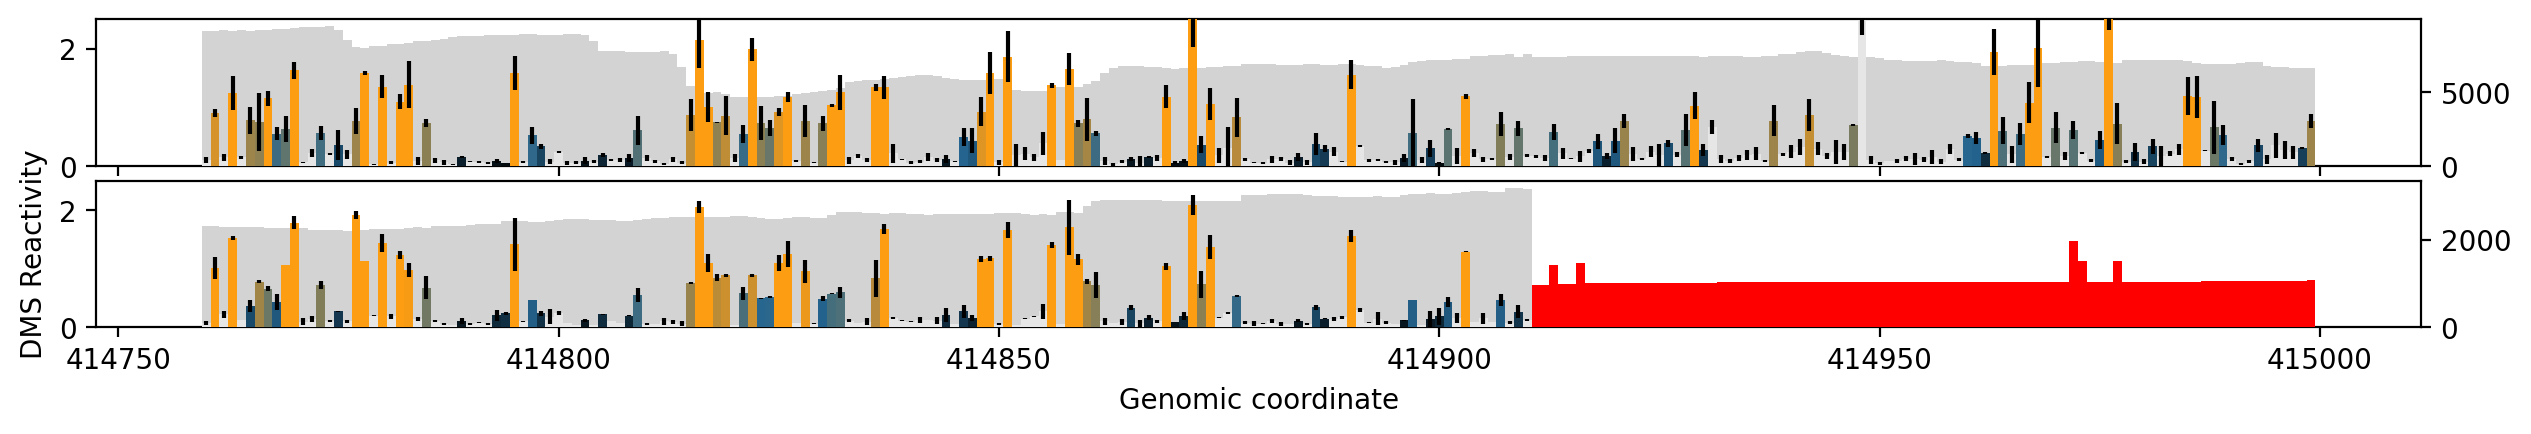

In [5]:
# plot individual profile for DBP2

chrom = 13
coords = (414760, 415000)
strand = '+'

fig, axs = plt.subplots(2, 1, figsize=[15, 2], sharex=True)
plt.subplots_adjust(hspace=0.1)

ax0 = axs[0].twinx()
dms_pro.plot_profile(chrom, strand, coords[0], coords[1], genome, axs[0], cmap_loc='../cmap.txt')
ax0.bar(np.arange(coords[0], coords[1]), dms_pro.cov_p[chrom][coords[0]:coords[1]], 1, color='lightgray')
axs[0].set_zorder(10)
axs[0].set_frame_on(False)

ax1 = axs[1].twinx()
dms_mat.plot_profile(chrom, strand, coords[0], coords[1], genome, axs[1], cmap_loc='../cmap.txt')
ax1.bar(np.arange(coords[0], coords[1]), dms_mat.cov_p[chrom][coords[0]:coords[1]], 1, color='lightgray')
axs[1].set_zorder(10)
axs[1].set_frame_on(False)
axs[1].set_ylabel('DMS Reactivity')
axs[1].set_xlabel('Genomic coordinate')

plt.setp([axs[0], axs[1]], ylim=(0, 2.5))
plt.show()

# Figure 1c

In [6]:
from src.DMS_Profile import PRO_Profile, pro_combine_profiles
from src.pro_utils import moving_average

In [7]:
# load data

spt4_pro = pro_combine_profiles([PRO_Profile('../data/processed/pro_spt4_1_mRNA_pro.pkl', 'spt4_R1', genome, norm=False), 
                                 PRO_Profile('../data/processed/pro_spt4_2_mRNA_pro.pkl', 'spt4_R2', genome, norm=False), 
                                 PRO_Profile('../data/processed/pro_spt4_3_mRNA_pro.pkl', 'spt4_R3', genome, norm=False)], 'spt4', genome, norm=True)

wild_pro = pro_combine_profiles([PRO_Profile('../data/processed/pro_wild_1_mRNA_pro.pkl', 'wild_R1', genome, norm=False), 
                                 PRO_Profile('../data/processed/pro_wild_2_mRNA_pro.pkl', 'wild_R2', genome, norm=False),
                                 PRO_Profile('../data/processed/pro_wild_3_mRNA_pro.pkl', 'wild_R3', genome, norm=False),
                                 PRO_Profile('../data/processed/pro_wild_4_mRNA_pro.pkl', 'wild_R4', genome, norm=False), 
                                 PRO_Profile('../data/processed/pro_wild_5_mRNA_pro.pkl', 'wild_R5', genome, norm=False),
                                 PRO_Profile('../data/processed/pro_wild_6_mRNA_pro.pkl', 'wild_R6', genome, norm=False),
                                 PRO_Profile('../data/processed/pro_wild_7_mRNA_pro.pkl', 'wild_R7', genome, norm=False), 
                                 PRO_Profile('../data/processed/pro_wild_8_mRNA_pro.pkl', 'wild_R8', genome, norm=False)], 'wild', genome, norm=True)

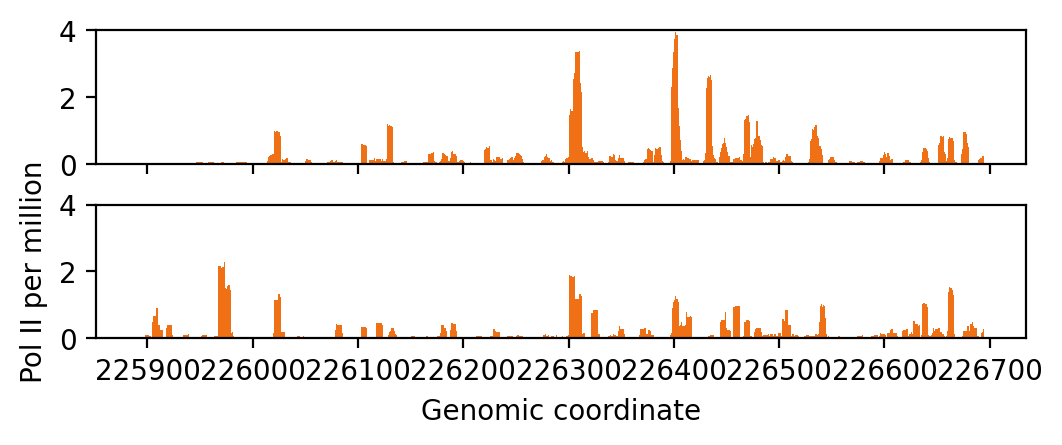

In [8]:
# plot individual profile

fig, axs = plt.subplots(2, 1, figsize=[6, 2], sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)

avg_win = 5

# RPS17A
chrom = 12
coords = (225889, 226697)

wild_pro.plot_profile(chrom, coords[0], coords[1], genome, axs[0], avg_win=avg_win)
spt4_pro.plot_profile(chrom, coords[0], coords[1], genome, axs[1], avg_win=avg_win)

plt.setp(axs, ylim=[0, 4])
plt.xlabel('Genomic coordinate')
plt.ylabel('Pol II per million')
plt.show()

# Figure 1d

/Users/leo/Documents/repos/CoSTseq/src/DMS_Profile.py:232: RuntimeWarning: invalid value encountered in divide
  meta_binned.append(norm_y/np.sum(norm_y))


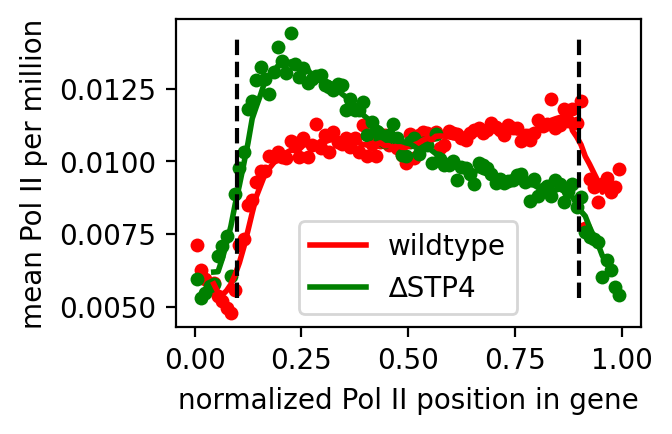

In [9]:
# plot meta profile

avg_win = 8 # should be even
n_bins  = 100
surr    = 0.1
min_ppm = 1

plt.figure(figsize=(3, 2))

meta_wild, norm_x, bin_size = wild_pro.get_meta_profile_binned(annotation, n_bins=n_bins, surr=surr)
meta_spt4, norm_x, bin_size = spt4_pro.get_meta_profile_binned(annotation, n_bins=n_bins, surr=surr)

mask_wild = np.array([np.all(i == i) for i in meta_wild])
mask_spt4 = np.array([np.all(i == i) for i in meta_spt4])

meta_wild_mean = np.mean(meta_wild[mask_wild & mask_spt4], axis=0)
meta_spt4_mean = np.mean(meta_spt4[mask_wild & mask_spt4], axis=0)

plt.plot(norm_x, meta_wild_mean, 'or', ms=5, mew=0)
plt.plot(norm_x, meta_spt4_mean, 'og', ms=5, mew=0)

plt.plot(norm_x[int(avg_win/2):-int(avg_win/2)+1], moving_average(meta_wild_mean, avg_win), '-r', lw=2, label=f"wildtype")
plt.plot(norm_x[int(avg_win/2):-int(avg_win/2)+1], moving_average(meta_spt4_mean, avg_win), '-g', lw=2, label=f"∆STP4")

plt.plot([surr, surr], [np.min(meta_spt4_mean), np.max(meta_spt4_mean)], '--k')
plt.plot([1-surr, 1-surr], [np.min(meta_spt4_mean), np.max(meta_spt4_mean)], '--k')

plt.legend()
plt.xlabel('normalized Pol II position in gene')
plt.ylabel('mean Pol II per million')
plt.show()

# Figure 1e and 1f

In [10]:
from src.dms_utils import normalize_cov, moving_average
import pickle

def scale_mm(x, xmin, xmax):
    return((x - xmin) / (xmax - xmin))

def norm_rea(rea):
    return(scale_mm(rea, np.mean(rea[5:8]), np.mean(rea[11:18])))

def x_univar(n, spread=0.2):
    return(spread*(np.random.rand(n)-0.5))
   
def plot_read2(s_id, axs, n_reps=3, pref='mrna', lim_l=5, lim_r=40, color='k'):
    read2_df  = pd.DataFrame()
    for n in range(n_reps):
        if pref == 'mrna':
            with open(f"../data/processed/pro_{s_id}_{n+1}_read2_cds.pkl", 'rb') as f:
                mut, cov = pickle.load(f)
                rea_raw = normalize_cov(mut, cov)
                rea = norm_rea(rea_raw)
        else:
            with open(f"../data/processed/pro_{s_id}_{n+1}_rrna_read2.pkl", 'rb') as f:
                mut, cov = pickle.load(f)
                rea_raw = normalize_cov(mut, cov)
                rea = norm_rea(rea_raw)

        axs.plot((np.arange(len(rea))+x_univar(len(rea)))[lim_l:lim_r], rea[lim_l:lim_r], '.', color=color, alpha=0.6)
        read2_df[f"{n+1}"] = rea
    axs.plot(np.arange(len(rea))[lim_l:lim_r], read2_df.median(axis=1)[lim_l:lim_r], '-', color=color, label=s_id, alpha=0.6)
    axs.legend()
    mean_for_norm = np.mean(read2_df.median(axis=1)[50:140])
    return(mean_for_norm)

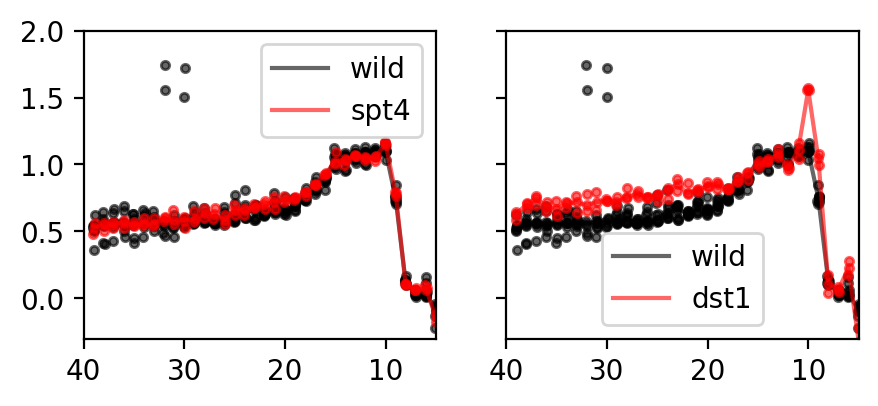

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2), sharex=True, sharey=True)
axs = axs.flatten()

# Pol II
_             = plot_read2('wild', axs[0], n_reps=8, pref='mrna', color='k')
_             = plot_read2('spt4', axs[0], n_reps=3, pref='mrna', color='r')

mean_for_norm = plot_read2('wild', axs[1], n_reps=8, pref='mrna', color='k')
_             = plot_read2('dst1', axs[1], n_reps=3, pref='mrna', color='r')

plt.setp(axs, ylim=(-0.3, 2), xlim=(40, 5))
plt.show()

# Figure S1a

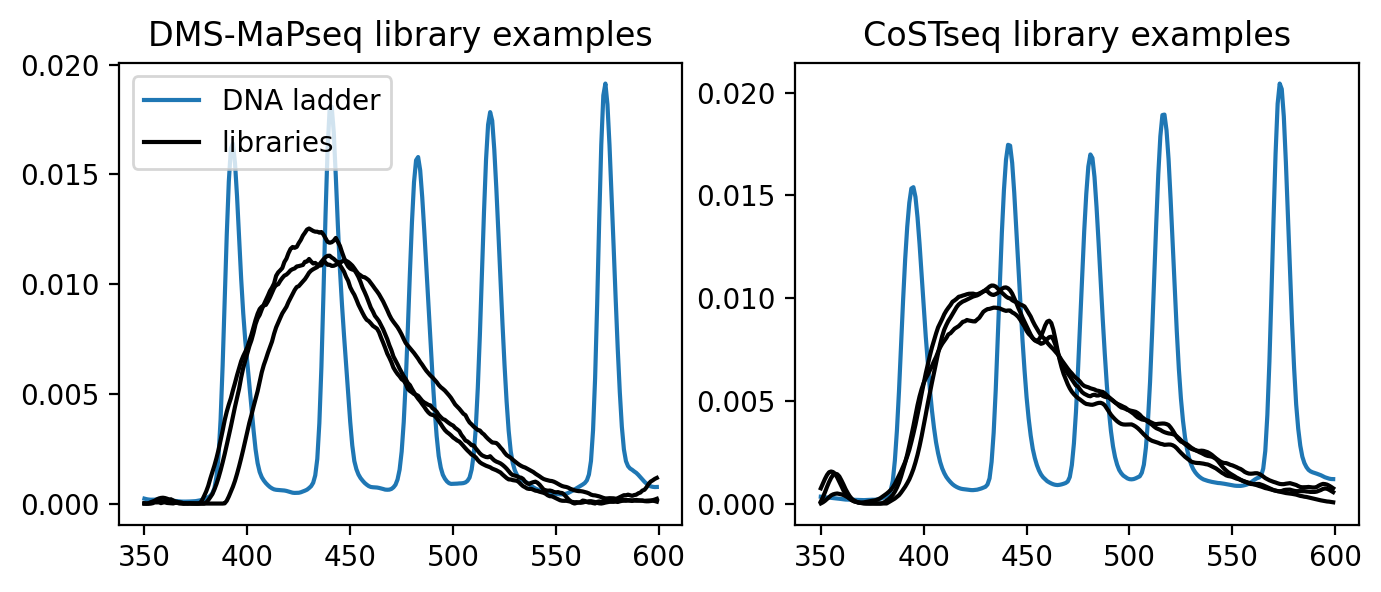

In [12]:
# load data
data = pd.read_csv('../data/RQ19739-RQ19825-cD1000_Electropherogram.csv')

# plot
srt = 350
end = 600

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].plot(data['A1: Ladder'][srt:end]/np.sum(data['A1: Ladder'][srt:end]), label='DNA ladder')
axs[1].plot(data['D3: Ladder'][srt:end]/np.sum(data['A1: Ladder'][srt:end]))

# mature
axs[0].plot(data['C2: mat_d3_1'][srt:end]/np.sum(data['C2: mat_d3_1'][srt:end]), '-k')
axs[0].plot(data['C1: mat_wt_2'][srt:end]/np.sum(data['C1: mat_wt_2'][srt:end]), '-k')
axs[0].plot(data['E2: mat_d3_3'][srt:end]/np.sum(data['E2: mat_d3_3'][srt:end]), '-k', label='libraries')
axs[0].set_title('DMS-MaPseq library examples')
axs[0].legend()

# nascent
axs[1].plot(data['C5: pro_s1_3'][srt:end]/np.sum(data['C5: pro_s1_3'][srt:end]), '-k')
axs[1].plot(data['D5: pro_d7_1'][srt:end]/np.sum(data['D5: pro_d7_1'][srt:end]), '-k')
axs[1].plot(data['E5: pro_d7_2'][srt:end]/np.sum(data['E5: pro_d7_2'][srt:end]), '-k')
axs[1].set_title('CoSTseq library examples')

plt.show()

# Figure S1b

In [13]:
dms_pro = combine_profiles([ DMS_Profile('../data/processed/pro_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/pro_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/pro_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/pro_dbp7_1_mRNA_agg.pkl', 'dbp7_R1', genome), 
                             DMS_Profile('../data/processed/pro_dbp7_2_mRNA_agg.pkl', 'dbp7_R2', genome), 
                             DMS_Profile('../data/processed/pro_dbp7_3_mRNA_agg.pkl', 'dbp7_R3', genome),
                             DMS_Profile('../data/processed/pro_dbp3_1_mRNA_agg.pkl', 'dbp3_R1', genome), 
                             DMS_Profile('../data/processed/pro_dbp3_2_mRNA_agg.pkl', 'dbp3_R2', genome), 
                             DMS_Profile('../data/processed/pro_dbp3_3_mRNA_agg.pkl', 'dbp3_R3', genome),
                             DMS_Profile('../data/processed/pro_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                             DMS_Profile('../data/processed/pro_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                             DMS_Profile('../data/processed/pro_spt4_3_mRNA_agg.pkl', 'spt4_R3', genome),
                             DMS_Profile('../data/processed/pro_stm1_1_mRNA_agg.pkl', 'stm1_R1', genome), 
                             DMS_Profile('../data/processed/pro_stm1_2_mRNA_agg.pkl', 'stm1_R2', genome), 
                             DMS_Profile('../data/processed/pro_stm1_3_mRNA_agg.pkl', 'stm1_R3', genome)], 'all_pro', genome, min_cov=900)

dms_mat = combine_profiles([ DMS_Profile('../data/processed/mat_wild_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/mat_wild_2_mRNA_agg.pkl', 'wild_R2', genome), 
                             DMS_Profile('../data/processed/mat_wild_3_mRNA_agg.pkl', 'wild_R3', genome),
                             DMS_Profile('../data/processed/mat_dbp7_1_mRNA_agg.pkl', 'dbp7_R1', genome), 
                             DMS_Profile('../data/processed/mat_dbp7_2_mRNA_agg.pkl', 'dbp7_R2', genome), 
                             DMS_Profile('../data/processed/mat_dbp7_3_mRNA_agg.pkl', 'dbp7_R3', genome),
                             DMS_Profile('../data/processed/mat_dbp3_1_mRNA_agg.pkl', 'dbp3_R1', genome), 
                             DMS_Profile('../data/processed/mat_dbp3_2_mRNA_agg.pkl', 'dbp3_R2', genome), 
                             DMS_Profile('../data/processed/mat_dbp3_3_mRNA_agg.pkl', 'dbp3_R3', genome),
                             DMS_Profile('../data/processed/mat_spt4_1_mRNA_agg.pkl', 'spt4_R1', genome), 
                             DMS_Profile('../data/processed/mat_spt4_2_mRNA_agg.pkl', 'spt4_R2', genome), 
                             DMS_Profile('../data/processed/mat_spt4_3_mRNA_agg.pkl', 'spt4_R3', genome),
                             DMS_Profile('../data/processed/mat_stm1_1_mRNA_agg.pkl', 'stm1_R1', genome), 
                             DMS_Profile('../data/processed/mat_stm1_2_mRNA_agg.pkl', 'stm1_R2', genome), 
                             DMS_Profile('../data/processed/mat_stm1_3_mRNA_agg.pkl', 'stm1_R3', genome)], 'all_mat', genome, min_cov=900)

unt_mat = combine_profiles([ DMS_Profile('../data/processed/mat_unwt_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/mat_unwt_2_mRNA_agg.pkl', 'wild_R2', genome)], 'all_mat', genome, min_cov=900)
                           
unt_pro = combine_profiles([ DMS_Profile('../data/processed/pro_unwt_1_mRNA_agg.pkl', 'wild_R1', genome), 
                             DMS_Profile('../data/processed/pro_unwt_2_mRNA_agg.pkl', 'wild_R2', genome),
                             DMS_Profile('../data/processed/pro_unwt_3_mRNA_agg.pkl', 'wild_R2', genome)], 'all_mat', genome, min_cov=900)


/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
# calculate mutation rates for individual nucleotides

def apply_mask(profile, mask):
    arr = np.hstack([p[msk] for p, msk in zip(profile, mask)])
    return(arr)

def comb_mask(mask1, mask2):
    return([i&j for i, j in zip(mask1, mask2)])

# individual nt masks
U = genome.mask_U()
A = genome.mask_A()
G = genome.mask_G()
C = genome.mask_C()
    
# treated
pro_U = np.hstack([apply_mask(dms_pro.rat_p, comb_mask(U, dms_pro.mask_p)), apply_mask(dms_pro.rat_m, comb_mask(A, dms_pro.mask_m))])
pro_A = np.hstack([apply_mask(dms_pro.rat_p, comb_mask(A, dms_pro.mask_p)), apply_mask(dms_pro.rat_m, comb_mask(U, dms_pro.mask_m))])
pro_G = np.hstack([apply_mask(dms_pro.rat_p, comb_mask(G, dms_pro.mask_p)), apply_mask(dms_pro.rat_m, comb_mask(C, dms_pro.mask_m))])
pro_C = np.hstack([apply_mask(dms_pro.rat_p, comb_mask(C, dms_pro.mask_p)), apply_mask(dms_pro.rat_m, comb_mask(G, dms_pro.mask_m))])

mat_U = np.hstack([apply_mask(dms_mat.rat_p, comb_mask(U, dms_mat.mask_p)), apply_mask(dms_mat.rat_m, comb_mask(A, dms_mat.mask_m))])
mat_A = np.hstack([apply_mask(dms_mat.rat_p, comb_mask(A, dms_mat.mask_p)), apply_mask(dms_mat.rat_m, comb_mask(U, dms_mat.mask_m))])
mat_G = np.hstack([apply_mask(dms_mat.rat_p, comb_mask(G, dms_mat.mask_p)), apply_mask(dms_mat.rat_m, comb_mask(C, dms_mat.mask_m))])
mat_C = np.hstack([apply_mask(dms_mat.rat_p, comb_mask(C, dms_mat.mask_p)), apply_mask(dms_mat.rat_m, comb_mask(G, dms_mat.mask_m))])

# untreated
unp_U = np.hstack([apply_mask(unt_pro.rat_p, comb_mask(U, unt_pro.mask_p)), apply_mask(unt_pro.rat_m, comb_mask(A, unt_pro.mask_m))])
unp_A = np.hstack([apply_mask(unt_pro.rat_p, comb_mask(A, unt_pro.mask_p)), apply_mask(unt_pro.rat_m, comb_mask(U, unt_pro.mask_m))])
unp_G = np.hstack([apply_mask(unt_pro.rat_p, comb_mask(G, unt_pro.mask_p)), apply_mask(unt_pro.rat_m, comb_mask(C, unt_pro.mask_m))])
unp_C = np.hstack([apply_mask(unt_pro.rat_p, comb_mask(C, unt_pro.mask_p)), apply_mask(unt_pro.rat_m, comb_mask(G, unt_pro.mask_m))])

unm_U = np.hstack([apply_mask(unt_mat.rat_p, comb_mask(U, unt_mat.mask_p)), apply_mask(unt_mat.rat_m, comb_mask(A, unt_mat.mask_m))])
unm_A = np.hstack([apply_mask(unt_mat.rat_p, comb_mask(A, unt_mat.mask_p)), apply_mask(unt_mat.rat_m, comb_mask(U, unt_mat.mask_m))])
unm_G = np.hstack([apply_mask(unt_mat.rat_p, comb_mask(G, unt_mat.mask_p)), apply_mask(unt_mat.rat_m, comb_mask(C, unt_mat.mask_m))])
unm_C = np.hstack([apply_mask(unt_mat.rat_p, comb_mask(C, unt_mat.mask_p)), apply_mask(unt_mat.rat_m, comb_mask(G, unt_mat.mask_m))])

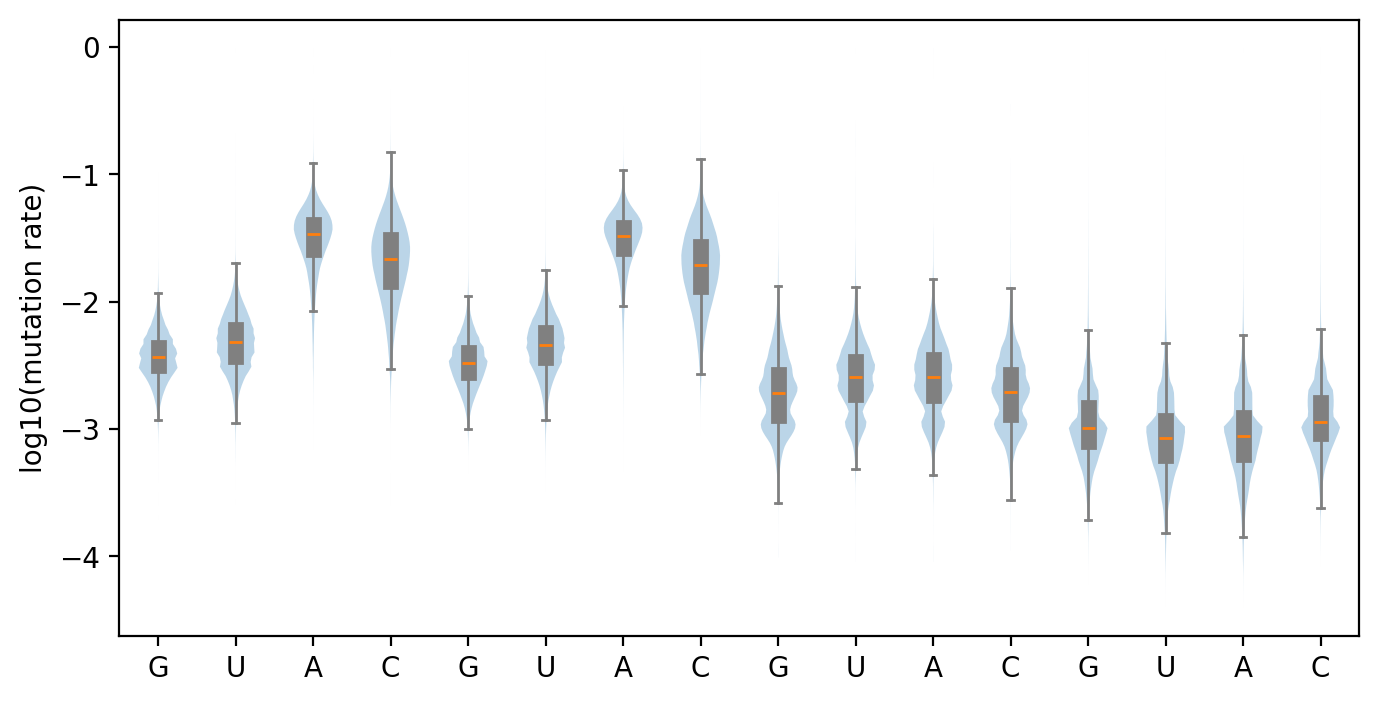

In [15]:
# plot mutation rates

fig, axs = plt.subplots(figsize=(8, 4))
sample_list = [pro_G, pro_U, pro_A, pro_C, mat_G, mat_U, mat_A, mat_C, unp_G, unp_U, unp_A, unp_C, unm_G, unm_U, unm_A, unm_C]
axs.violinplot([np.log10(i) for i in sample_list], showextrema=False)
c = 'gray'
axs.boxplot([np.log10(i) for i in sample_list], showfliers=False, widths=0.17, patch_artist=True, boxprops=dict(facecolor=c, color=c), capprops=dict(color=c), whiskerprops=dict(color=c))

plt.xticks(np.arange(1, 17, 1), ['G', 'U', 'A', 'C', 'G', 'U', 'A', 'C','G', 'U', 'A', 'C','G', 'U', 'A', 'C'])
plt.ylabel('log10(mutation rate)')
plt.show()

# Figure S1c

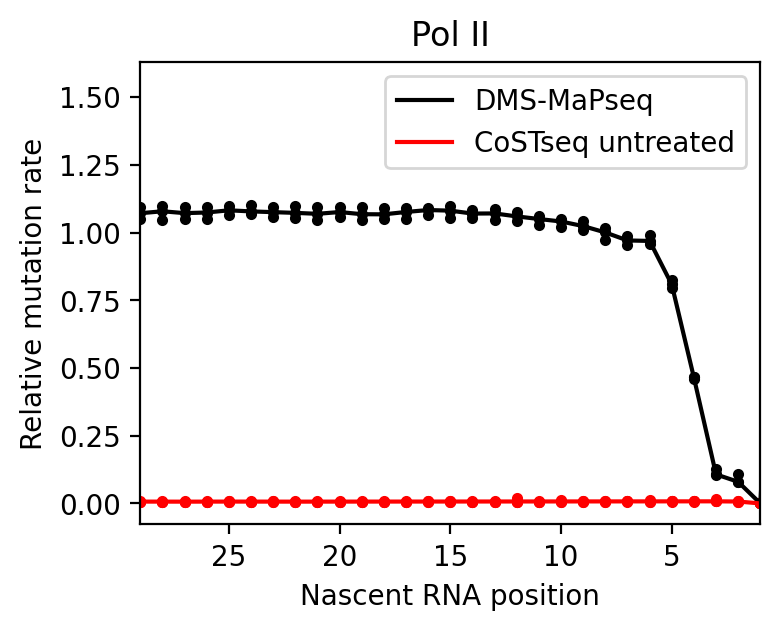

In [16]:
fig, axs = plt.subplots(figsize=(4, 3))

# DMS-MaPseq
n_reps = 3
read2_df  = pd.DataFrame()
for n in range(n_reps):
    with open(f"../data/processed/mat_wild_{n+1}_mrna_read2.pkl", 'rb') as f:
        mut, cov = pickle.load(f)
        # correct coverage bias
        rea = normalize_cov(mut, cov)
        nrm = np.mean(rea[50:140])
        # normalize reactivity based on average last nts (50-140)
        rea = rea/nrm
    axs.plot(rea, '.k')
    read2_df[f"{n+1}"] = rea

# untreated CoSTseq
n_reps = 4
read2_un  = pd.DataFrame()
for n in range(n_reps):
    with open(f"../data/processed/pro_unwt_{n+1}_mrna_read2.pkl", 'rb') as f:
        mut, cov = pickle.load(f)
        # correct coverage bias
        rea = normalize_cov(mut, cov)
        # normalize reactivity based on average last nts (50-140)
        rea = rea/mean_for_norm
    axs.plot(rea, '.r')
    read2_un[f"{n+1}"] = rea


axs.plot(read2_df.median(axis=1), '-k', label='DMS-MaPseq')
axs.plot(read2_un.median(axis=1), '-r', label='CoSTseq untreated')
axs.set_title(f"Pol II")
axs.set_xlabel('Nascent RNA position')
axs.set_ylabel('Relative mutation rate')
axs.legend()
axs.set_xlim([1, 29])
axs.invert_xaxis()
plt.show()

# Figure S1d

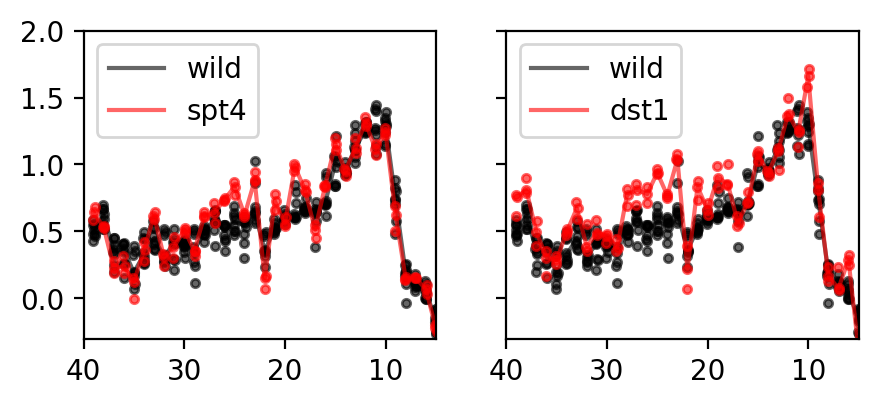

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2), sharex=True, sharey=True)
axs = axs.flatten()

# Pol II
_             = plot_read2('wild', axs[0], n_reps=8, pref='rrna', color='k')
_             = plot_read2('spt4', axs[0], n_reps=3, pref='rrna', color='r')

mean_for_norm = plot_read2('wild', axs[1], n_reps=8, pref='rrna', color='k')
_             = plot_read2('dst1', axs[1], n_reps=3, pref='rrna', color='r')

plt.setp(axs, ylim=(-0.3, 2), xlim=(40, 5))
plt.show()